In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('rainfall.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
#checking the size of the dataser
df.shape

(8425, 23)

In [14]:
#checking the columns of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
#getting an overall overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [16]:
#checking the data types of the dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [17]:
#checking the unique numbers of the dataset
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [18]:
#checkig the null values of the dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

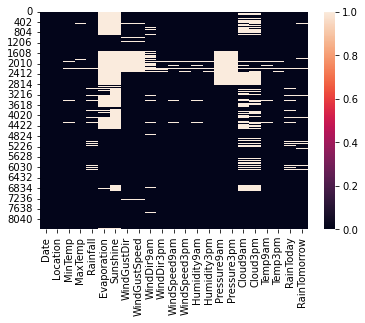

In [19]:
sns.heatmap(df.isnull())

In [20]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('_____________________________________')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
_____________________________________
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
_____________________________________
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
_____________________________________
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
_____________________________________
0.0      5299
0.2

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [22]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year
df.drop(columns=['Date'],axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [24]:
#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Fillinf null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])


In [25]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

<AxesSubplot:>

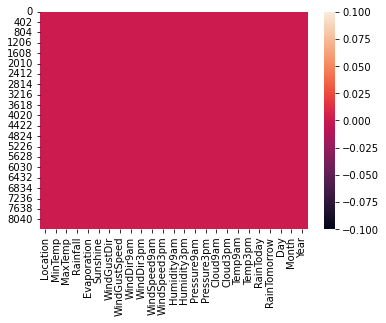

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


In [28]:
#checking categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

C:\Users\Lenovo\so11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


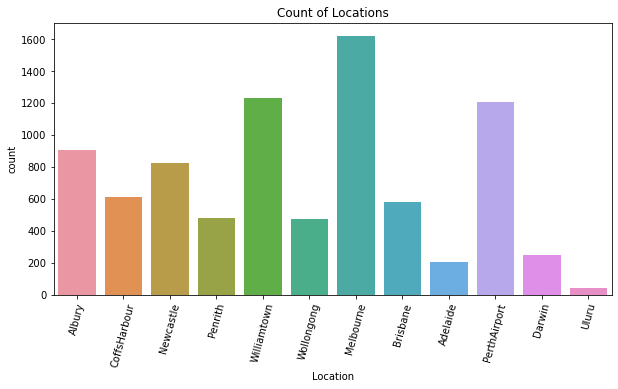

In [29]:
# Visualizing the various Locations present in the dataset
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

C:\Users\Lenovo\so11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


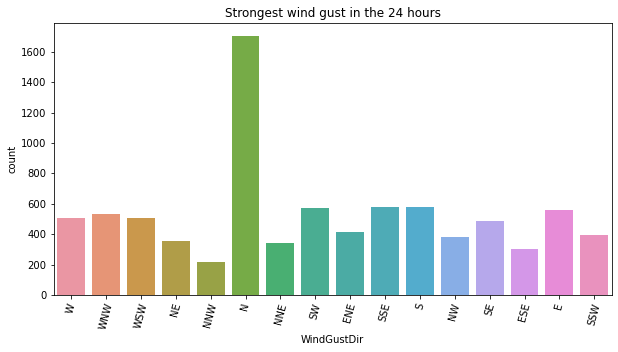

In [30]:
# Visualizing the direction of the strongest wind gust in the 24 hours to midnight
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()

C:\Users\Lenovo\so11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\so11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


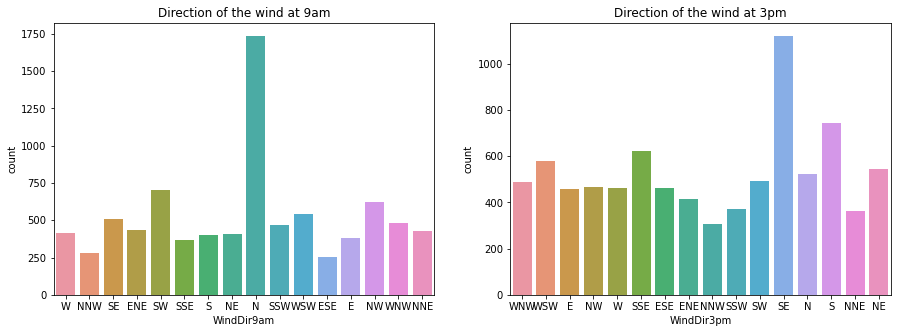

In [31]:
#Visualization of wind at 9 am and 3pm.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

C:\Users\Lenovo\so11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\so11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


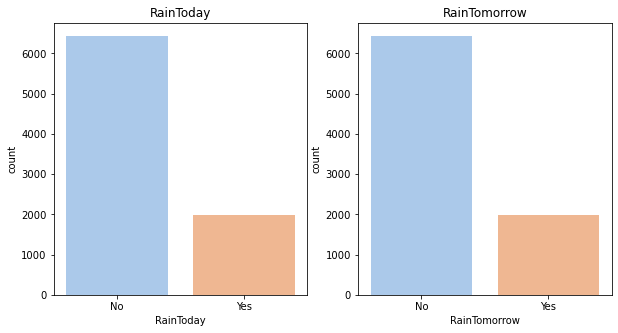

In [32]:
#Visualization of Rainfall today and tomorrow:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

In [33]:
len(num_col)

NameError: name 'num_col' is not defined

In [34]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

NameError: name 'num_col' is not defined

<Figure size 1440x1800 with 0 Axes>

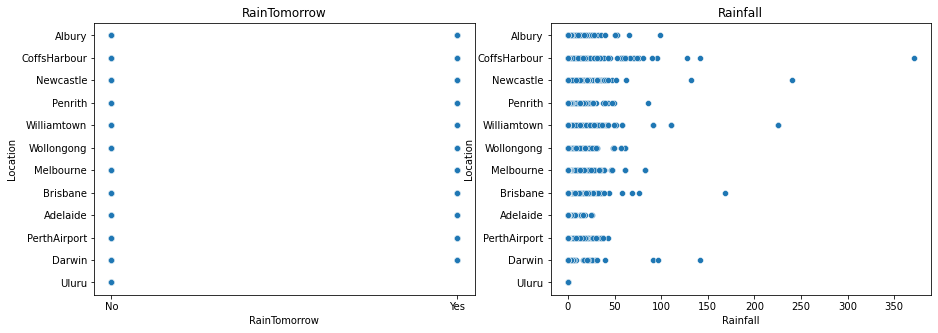

In [35]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

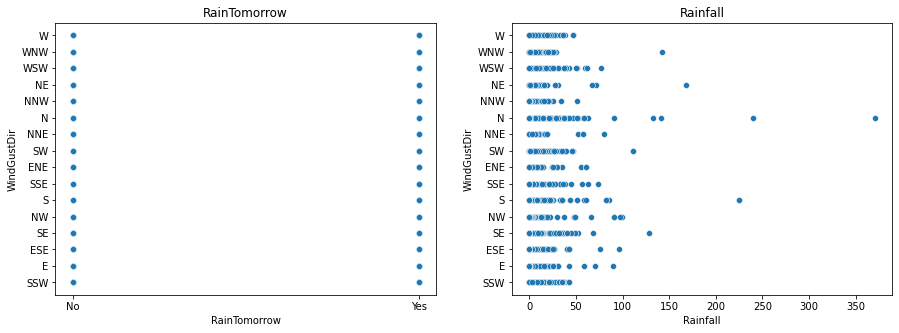

In [36]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

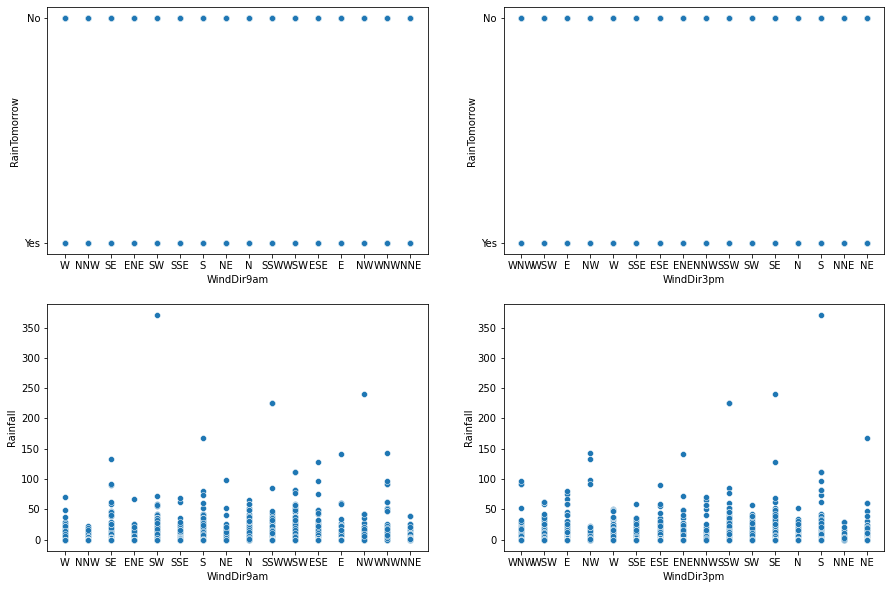

In [37]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

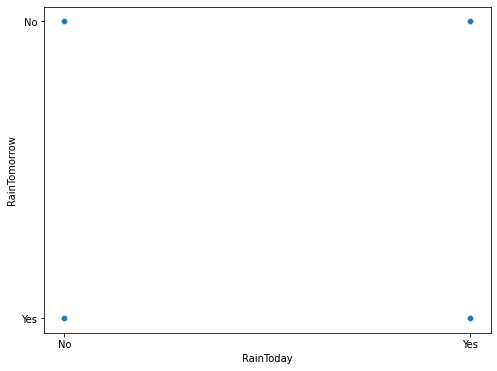

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

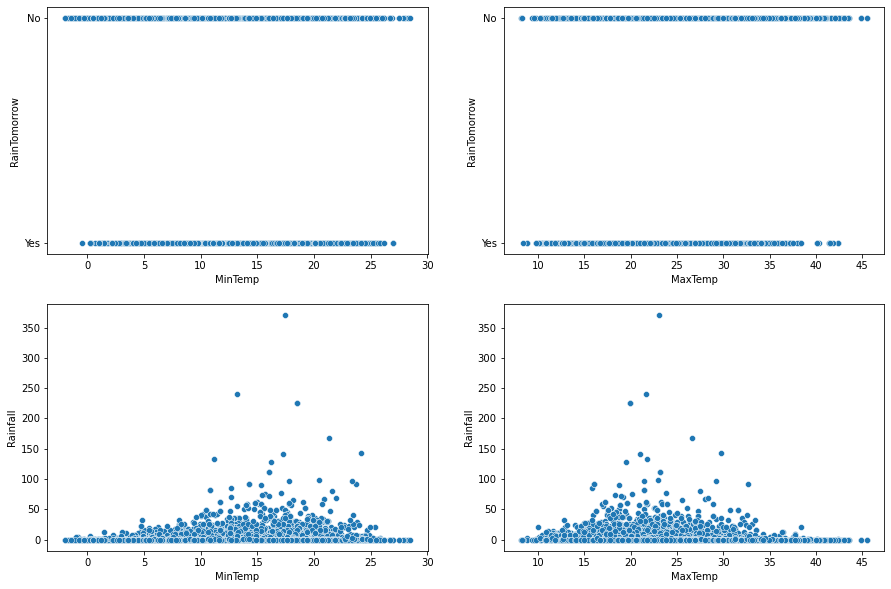

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)


<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

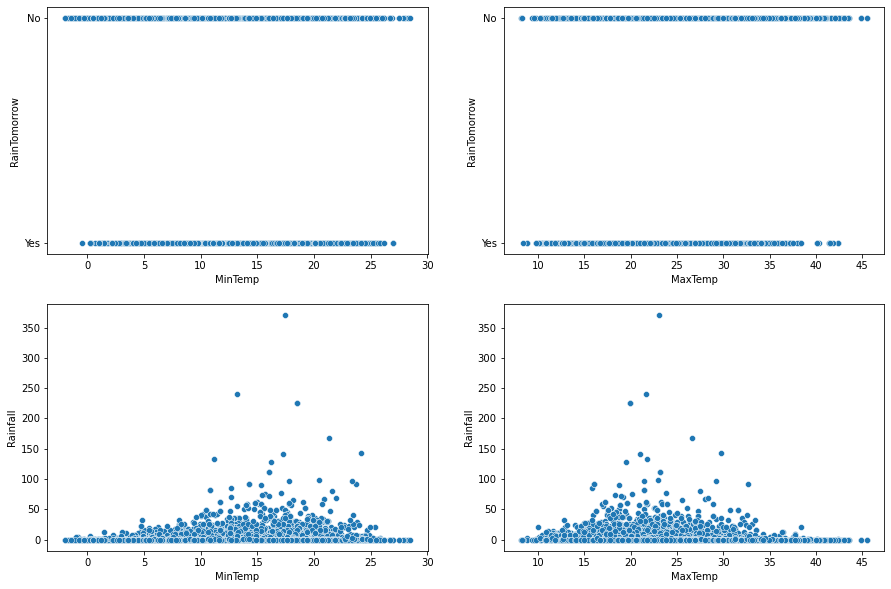

In [42]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

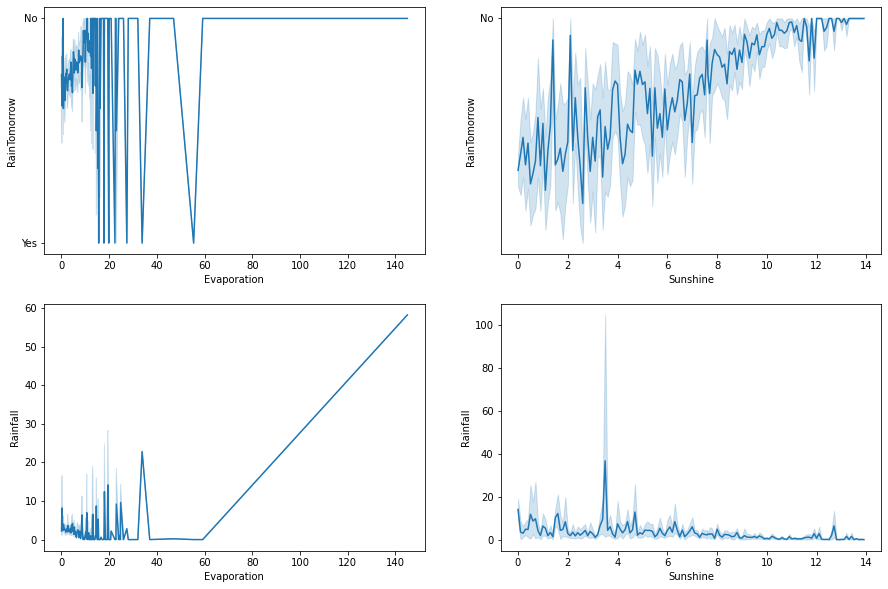

In [43]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

KeyboardInterrupt: 

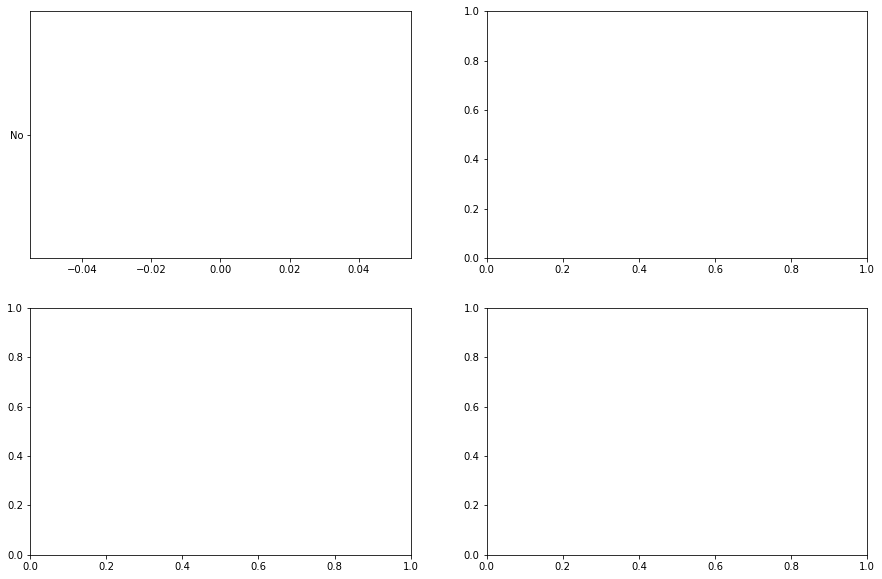

In [44]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)


<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

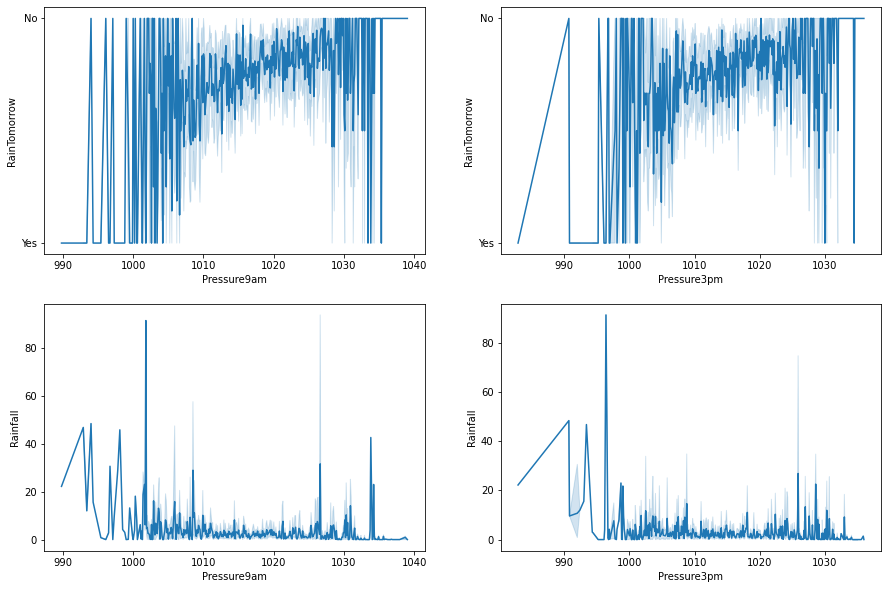

In [45]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

In [46]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [48]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]


z=np.abs(zscore(feature))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.206021,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.264165,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.264165,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.264165,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.167258,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.264165,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.264165,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.264165,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.264165,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [49]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [50]:
new_df.skew().sort_values()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12204\2767726652.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew().sort_values()


Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

In [51]:

new_df["Sunshine"] = np.log1p(new_df["Sunshine"])
new_df["Rainfall"] = np.log1p(new_df["Rainfall"])
new_df["Evaporation"] = np.log1p(new_df["Evaporation"])
new_df["WindSpeed9am"] = np.log1p(new_df["WindSpeed9am"])
new_df["WindGustSpeed"] = np.log1p(new_df["WindGustSpeed"])
#checking skewness again
new_df.skew().sort_values()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12204\306574226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Sunshine"] = np.log1p(new_df["Sunshine"])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12204\306574226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Rainfall"] = np.log1p(new_df["Rainfall"])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12204\306574226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Sunshine        -2.460672
WindSpeed9am    -1.186810
Evaporation     -0.993594
WindGustSpeed   -0.526267
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
Rainfall         1.811941
dtype: float64